In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python matplotlib

In [ ]:
pip install split-folders

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import splitfolders
import os, os.path
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import numpy as np
from google.colab import files
import keras.utils as image
import random
import shutil

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

print("the version of tensorflow that use in this session is " + tf.__version__)

the version of tensorflow that use in this session is 2.14.0


# Load File

In [ ]:
# path joining version for other paths - Banyaknya data yang dimiliki
paper_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/Data Original/paper'
print ("Paper:", sum(len(files) for _, _, files in os.walk(paper_dir)))
rock_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/Data Original/rock'
print ("Rock:", sum(len(files) for _, _, files in os.walk(rock_dir)))
scissors_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/Data Original/scissors'
print ("Scissors:", sum(len(files) for _, _, files in os.walk(scissors_dir)))

main_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/Data Original/'
print ("Total Data:", sum(len(files) for _, _, files in os.walk(main_dir)))

Paper: 712
Rock: 726
Scissors: 750
Total Data: 2188


In [ ]:
# Definisikan path untuk direktori data train dan validation
train_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/validation'

# Buat direktori train dan validation untuk menampung data yang di split
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [ ]:
# Fungsi untuk membagi data menjadi train dan validation
def split_data(source, train, validation, split_size):
    files = os.listdir(source)
    random.sample(files, len(files))  # Acak urutan file untuk memastikan pemilihan acak

    train_files = files[:int(len(files) * split_size)]
    validation_files = files[int(len(files) * split_size):]

    os.makedirs(train, exist_ok=True)  # Buat direktori train jika belum ada
    os.makedirs(validation, exist_ok=True)  # Buat direktori validation jika belum ada

    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(train, file))

    for file in validation_files:
        shutil.copy(os.path.join(source, file), os.path.join(validation, file))

In [ ]:
# Bagi data untuk setiap kategori
split_data(paper_dir, train_dir + '/paper', validation_dir + '/paper', 0.6)
split_data(rock_dir, train_dir + '/rock', validation_dir + '/rock', 0.6)
split_data(scissors_dir, train_dir + '/scissors', validation_dir + '/scissors', 0.6)

# Hitung total data train dan validation
total_train = sum(len(files) for _, _, files in os.walk(train_dir))
total_validation = sum(len(files) for _, _, files in os.walk(validation_dir))

print(f"Total Data Train: {total_train}")
print(f"Total Data Validation: {total_validation}")

Total Data Train: 1312
Total Data Validation: 876


# Image Generator + Augmentation Image

In [ ]:
# Image augmentation
train_datagenerator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90, #random rotation antara 0-90 derajat
                    width_shift_range=0.2, #prosentasi width untuk random shift
                    height_shift_range=0.2, #prosentasi height untuk random shift
                    horizontal_flip=True, #horizontal flip untuk posisi tangan horizontal
                    brightness_range=[0.2,1.0], #mainkan brightness kalau ada kekurangan cahaya
                    # shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagenerator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90, #random rotation antara 0-90 derajat
                    width_shift_range=0.2, #prosentasi width untuk random shift
                    height_shift_range=0.2, #prosentasi height untuk random shift
                    horizontal_flip=True, #horizontal flip untuk posisi tangan horizontal
                    brightness_range=[0.3,1.0], #mainkan brightness kalau ada kekurangan cahaya
                    # shear_range = 0.2,
                    fill_mode = 'nearest')

Berikut adalah penjelasan singkat tentang parameter yang digunakan dalam ImageDataGenerator:

1. rescale: Mengubah nilai piksel menjadi rentang 0 hingga 1 dengan cara membagi setiap piksel dengan 255.

2. rotation_range: Mengatur rentang untuk rotasi acak gambar dalam derajat.

3. width_shift_range dan height_shift_range: Menggeser gambar secara horizontal dan vertikal dengan rentang yang ditentukan sebagai persentase lebar atau tinggi gambar.

4. horizontal_flip: Melakukan flip horizontal secara acak pada gambar. Berguna untuk kasus di mana orientasi objek tidak penting.

5. brightness_range: Mengatur rentang kecerahan acak pada gambar.

6. shear_range: Mengatur rentang peregangan (shear) acak pada gambar.

7. fill_mode: Strategi pengisian yang digunakan untuk mengisi piksel yang kosong setelah pergeseran atau rotasi gambar.1.

In [ ]:
#Persiapan Data Training dan Validasi Generator

train_generator = train_datagenerator.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=100,
        # Klasifikasi Multi-Class (>2)
        class_mode='categorical')

validation_generator = validation_datagenerator.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=100 ,
        # Klasifikasi Multi-Class (>2)
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Saving Image Genarator Result

In [ ]:
# Set the directory where you want to save the generated images for train and validation
train_save_directory = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/generated images/train/'
validation_save_directory = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/generated images/validation/'

# Make sure the directories exist or create them if they don't
os.makedirs(train_save_directory, exist_ok=True)
os.makedirs(validation_save_directory, exist_ok=True)

In [ ]:
# Set the number of batches you want to generate and save for each generator
num_batches_to_generate = 25

# Function to save generated images for a specific generator
def save_generated_images(generator, save_directory):
    for i in range(num_batches_to_generate):
        batch = generator.next()  # Get the next batch of images and labels
        images = batch[0]  # Extract images from the batch
        labels = batch[1]  # Extract labels from the batch

        for j, image in enumerate(images):
            image_filename = f"generated_image_{i * num_batches_to_generate + j}.png"  # Create a unique filename for each image
            image_save_path = os.path.join(save_directory, image_filename)  # Path to save the image

            # Save the image to the specified path
            # Assuming the images are in the format of NumPy arrays
            # Modify the saving process based on the format of images you have
            # For example, using PIL: Image.fromarray(image).save(image_save_path)
            # Or using OpenCV: cv2.imwrite(image_save_path, image)
            # Here we assume the images are in the range of 0-255 and need to be converted to uint8
            image = (image * 255).astype('uint8')
            # Save the image as PNG format
            Image.fromarray(image).save(image_save_path)

# Save generated images for train_generator
save_generated_images(train_generator, train_save_directory)

# Save generated images for validation_generator
save_generated_images(validation_generator, validation_save_directory)

In [ ]:
# path joining version for other paths - Banyaknya data yang dimiliki
augmentation_train_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/generated images/train'
print ("Augmentation Image for Train Set:", sum(len(files) for _, _, files in os.walk(augmentation_train_dir)))
augmentation_validation_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/generated images/validation'
print ("Augmentation Image for Validation Set:", sum(len(files) for _, _, files in os.walk(augmentation_validation_dir)))

Augmentation Image for Train Set: 700
Augmentation Image for Validation Set: 700


# Build Model ANN and Callback Function

# Callback for monitoring the accuracy

In [ ]:
#Penggunaan Callback untuk menghentikan proses training sesuai akurasi yang diinginkan

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_accuracy = logs.get('val_accuracy')
        accuracy = logs.get('accuracy')

        if val_accuracy is not None and accuracy is not None:
            if val_accuracy > 0.9 and accuracy > 0.9:
                print("\nSudah >90% nih akurasinya jadi diberhentikan saja!")
                self.model.stop_training = True
            else:
                print("\nBelum mencapai akurasi >90%, lanjutkan training.")
        else:
            print("\nNilai akurasi tidak tersedia. Lanjutkan training.")


callbacks = myCallback()

# Deep learning Arsitektur sequential model

In [ ]:
#Model sederhana Deep Learning 3 Conv dan 2 Fully Connected Layer (dense layer)
model = tf.keras.models.Sequential([ #Menggunakan model Sequential
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3), #melakukan dropout(mematikan neuron) pada 30% layer sebelumnya
  tf.keras.layers.Dense(3, activation='softmax') #3 kelas
])

In [ ]:
# Meng-compile model dengan Adam Optimizer dengan loss Categorical_Crossentropy karena multiclass classification
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

# Visualize of my model architecture

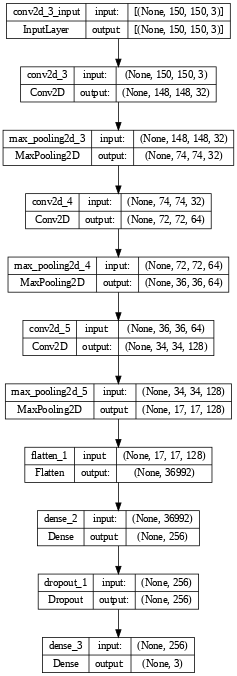

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          # to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

# Let's Train the Model

In [ ]:
print(f"Total Data Train: {len(train_generator)}")
print(f"Total Data Validation: {len(validation_generator)}")

Total Data Train: 14
Total Data Validation: 9


# Assign the initial parameter values for Training Model

In [ ]:
epoh = 350 # Tentukan banyaknya model melakukan satu putaran penuh terhadap seluruh dataset training.
batch_size = 4 # seberapa banyak model membagi data train pada setiap epoch yang dilakukan

# Hitung steps_per_epoch dan validation_steps
steps_per_epoch = int(np.ceil(len(train_generator) / batch_size)) # ini tergantung pada banyak data dan jumlah batch_sizenya
validation_steps = int(np.ceil(len(validation_generator) / batch_size))  # ini tergantung pada banyak data dan jumlah batch_sizenya

In [ ]:
len(train_generator)

44

# What happend to the model training???

this is happended ⁉ Ulasan terperinci tentang implikasi dari nilai-nilai yang telah ditentukan terhadap komponen-komponen seperti `epochs`, `batch size`, `steps per epoch`, dan `validation steps` dalam konteks pelatihan model:

### Nilai-nilai yang ditentukan:
- **Epochs**: 350
- **Batch size**: 4
- **Total data training**: 700
- **Total data validasi**: 700

### Interpretasi:
1. **Epochs (Epoch)**:
   - Dengan jumlah **epochs** yang cukup besar (350), model akan melihat dataset training sebanyak 350 kali selama proses pelatihan.
   - Penggunaan **epochs** yang tinggi dapat memberikan kesempatan bagi model untuk mempelajari pola yang lebih dalam dari data, tetapi harus dipertimbangkan untuk menghindari overfitting.

2. **Batch size**:
   - Dengan **batch size** yang kecil (4), model akan melihat dan memperbarui bobotnya setiap kali melihat 4 sampel data.
   - Batch size kecil bisa menghasilkan konvergensi yang lebih baik namun bisa memperlambat proses pelatihan.

3. **Steps per epoch**:
   - Jumlah **steps per epoch** dihitung berdasarkan total data training dibagi dengan **batch size**. Dalam konteks ini, akan ada 175 iterasi (jumlah sampel data training dibagi dengan batch size) pada setiap epoch.

4. **Validation steps**:
   - **Validation steps** dihitung dengan cara yang serupa seperti **steps per epoch**, namun pada dataset validasi. Dalam hal ini, akan ada 175 iterasi (jumlah sampel data validasi dibagi dengan batch size) pada setiap epoch untuk mengevaluasi model terhadap data validasi.

### Implikasi dan Hubungan:
- Dengan 350 **epochs** dan **batch size** 4, akan ada 175 iterasi pada setiap **epoch** yang melibatkan seluruh dataset training.
- Setiap iterasi akan menggunakan **batch size** 4 untuk memperbarui bobot model.
- Proses evaluasi pada dataset validasi akan dilakukan 175 kali pada setiap **epoch** untuk mengukur performa model terhadap data validasi.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Tentukan kondisi EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor akurasi pada data validasi (nilai ini yang diperhatikan)
    patience=10,  # Toleransi untuk tidak ada peningkatan (10 iterasi jika akurasi menunjukkan nilai-nilai yang homogen maka stop)
    restore_best_weights=True,  # Kembalikan bobot terbaik ketika berhenti
    verbose=1
)

# Parameter verbose
dalam objek `EarlyStopping` mengontrol tingkat `detail atau kejelasan` pesan yang akan ditampilkan selama proses pelatihan ketika kondisi EarlyStopping terpenuhi.

Nilai-nilai yang dapat diberikan kepada parameter verbose adalah:

- `0`: Tidak ada pesan yang ditampilkan selama proses pelatihan berlangsung.
- `1`: Menampilkan pesan tentang penghentian diterapkan secara singkat, misalnya "Early stopping condition triggered".
- `2`: Menampilkan pesan yang lebih rinci, memberikan informasi tentang kondisi penghentian dan langkah-langkah yang diambil saat kriteria EarlyStopping terpenuhi.

In [ ]:
start_time = time.time()
history = model.fit(
    train_generator,  # Data generator untuk data latih
    steps_per_epoch=steps_per_epoch,  # Jumlah iterasi dalam setiap epoch (dihitung dari total data latih dan batch size)
    epochs=epoh,  # Jumlah epoch yang akan dilakukan selama proses pelatihan
    validation_data=validation_generator,  # Data generator untuk data validasi
    validation_steps=validation_steps,  # Jumlah iterasi dalam setiap epoch saat melakukan validasi
    callbacks=[callbacks, early_stopping],  # Daftar callbacks yang akan digunakan selama pelatihan
    verbose=2  # Level kejelasan pesan yang akan ditampilkan selama pelatihan (informasi lebih detail)
)

print("--- Waktu training adalah %s detik ---" % (time.time() - start_time))

Epoch 1/350

Belum mencapai akurasi >90%, lanjutkan training.
11/11 - 91s - loss: 1.1903 - accuracy: 0.3281 - val_loss: 1.0960 - val_accuracy: 0.3400 - 91s/epoch - 8s/step
Epoch 2/350

Belum mencapai akurasi >90%, lanjutkan training.
11/11 - 99s - loss: 1.0917 - accuracy: 0.3696 - val_loss: 1.0801 - val_accuracy: 0.4162 - 99s/epoch - 9s/step
Epoch 3/350

Belum mencapai akurasi >90%, lanjutkan training.
11/11 - 82s - loss: 1.0601 - accuracy: 0.4373 - val_loss: 1.1151 - val_accuracy: 0.3900 - 82s/epoch - 7s/step
Epoch 4/350

Belum mencapai akurasi >90%, lanjutkan training.
11/11 - 76s - loss: 1.0792 - accuracy: 0.4121 - val_loss: 1.1020 - val_accuracy: 0.3525 - 76s/epoch - 7s/step
Epoch 5/350

Belum mencapai akurasi >90%, lanjutkan training.
11/11 - 77s - loss: 1.0460 - accuracy: 0.4555 - val_loss: 1.0052 - val_accuracy: 0.5025 - 77s/epoch - 7s/step
Epoch 6/350

Belum mencapai akurasi >90%, lanjutkan training.
11/11 - 75s - loss: 1.0263 - accuracy: 0.4496 - val_loss: 1.0565 - val_accurac

KeyboardInterrupt: ignored

# What happened above:
`Proses pelatihan` dilakukan dengan menggunakan `model.fit()` dengan `generator data` untuk sampel `latih dan validasi`.
Jumlah iterasi yang dilakukan dalam setiap `epoch` diatur oleh `steps_per_epoch` dan `validation_steps` yang dihitung berdasarkan ukuran batch dan total sampel data.
`Callbacks` seperti callbacks dan early_stopping digunakan untuk `mengontrol dan memonitor` pelatihan model, seperti penghentian dini jika kriteria terpenuhi.
`Informasi tentang kemajuan pelatihan` akan ditampilkan pada tingkat kejelasan `(verbose)` yang telah ditentukan.
Setelah pelatihan selesai, `waktu total` yang diperlukan untuk `pelatihan` akan dicetak sebagai informasi tambahan.

# Time Running for Training Model

Saya sudah train tapi lupa untuk membuat start and end time for train model. Jadi saya menggunakan waktu yang tertera di detail yang ada disetiap epoch.

In [ ]:
# Simpan data waktu ke dalam DataFrame
time_data = {
    'Epoch': list(range(1, 22)),  # Nomor epoch
    'Training_Time': [91, 99, 82, 76, 77, 75, 101, 75, 76, 76, 80, 79, 82, 77, 78, 76, 77, 75, 76, 76, 77],  # Waktu pelatihan
}

# Buat DataFrame
time_df = pd.DataFrame(time_data)

In [ ]:
durasi_train_model = time_df['Training_Time'].sum()/60
print(f'Model ini dilatih dengan durasi: {durasi_train_model} menit')

Model ini dilatih dengan durasi: 28.016666666666666 menit


# Evaluasi Model

In [ ]:
# Melakukan evaluasi terhadap model menggunakan data validasi
evaluation = model.evaluate(validation_generator, steps=validation_steps, verbose=1)

# Menampilkan hasil evaluasi
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

8/8 [==============================] - 19s 2s/step - loss: 0.3399 - accuracy: 0.9013
Loss: 0.3399411737918854
Accuracy: 0.9012500047683716


# So Final Accuracy here is `90%`

# Save the model

In [ ]:
#'model' akan di save ke local file
model.save('/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/RockPaperScissors_model')  # Replace 'path_to_save_model' with your desired path

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/RockPaperScissors_model')  # Replace 'path_to_save_model' with the saved model's path

# Try to predict here

Data prediksi adalah data yang saya buat dengan mengambil gambar tangan saya sendiri membentuk batu, gunting dan kertas.

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Directory containing the images for prediction
directory = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/testing images'

# List to store the predictions
predictions = []

# Iterate through each file in the directory
for filename in os.listdir(directory):
    img_path = os.path.join(directory, filename)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image data

    # Perform prediction
    prediction = loaded_model.predict(img_array)
    predictions.append({
        'filename': filename,
        'prediction': prediction
    })

# Display the predictions
for pred in predictions:
    print(f"File: {pred['filename']}, Prediction: {pred['prediction']}")


1/1 [==============================] - 0s 35ms/step
File: Kertas_1.jpg, Prediction: [[9.9999928e-01 5.7178659e-07 8.7882626e-08]]
File: Batu_2.jpg, Prediction: [[1.0000000e+00 1.7679861e-08 2.0885109e-09]]
File: Batu_1.jpg, Prediction: [[1.0000000e+00 8.9088803e-10 5.5594362e-10]]
File: Gunting_1.jpg, Prediction: [[1.0000000e+00 8.6260260e-10 2.0058788e-09]]
File: Gunting_2.jpg, Prediction: [[1.0000000e+00 9.0628252e-09 5.8386793e-09]]
File: Kertas_2.jpg, Prediction: [[1.0000000e+00 8.0863911e-09 3.0941463e-09]]


In [ ]:
class_names = ['Kertas', 'Batu', 'Gunting']  # List nama kelas

for pred in predictions:
    class_index = np.argmax(pred['prediction'])  # Dapatkan indeks kelas dengan probabilitas tertinggi
    class_name = class_names[class_index]  # Ambil nama kelas dari list class_names
    print(f"File: {pred['filename']}, Prediction: {class_name}")

File: Kertas_1.jpg, Prediction: Kertas
File: Batu_2.jpg, Prediction: Kertas
File: Batu_1.jpg, Prediction: Kertas
File: Gunting_1.jpg, Prediction: Kertas
File: Gunting_2.jpg, Prediction: Kertas
File: Kertas_2.jpg, Prediction: Kertas
